In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns
import matplotlib.pylab as plt
import plotly.express as px

import copy

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('Flights_2019_v3.csv')
df = df.drop(['Unnamed: 0'], axis=1)
df['FL_DATE'] = pd.to_datetime(df.FL_DATE, utc=True)
df = df.drop_duplicates()

In [ ]:
df_sample = pd.read_csv('flight_2019_subset.csv')
df_sample = df_sample.drop(['Unnamed: 0'], axis=1)
df_sample['FL_DATE'] = pd.to_datetime(df_sample.FL_DATE, utc=True)

merged_df = df.merge(df_sample, how='left', indicator=True, on=['FL_DATE', 'ORIGIN_AIRPORT_ID', 'DEST_AIRPORT_ID', "DEP_DELAY", 'ARR_DELAY'])
#df = df[merged_df['_merge'] == 'left_only']

df_sample.columns

Index(['YEAR', 'DAY_OF_WEEK', 'DAY_OF_WEEK_STR', 'FL_DATE',
       'ORIGIN_AIRPORT_ID', 'ORIGIN_AIRPORT_SEQ_ID', 'ORIGIN_Name',
       'ORIGIN_IATA', 'ORIGIN_ICAO', 'ORIGIN_CITY_MARKET_ID',
       'ORIGIN_CITY_NAME', 'ORIGIN_STATE_ABR', 'ORIGIN_Latitude',
       'ORIGIN_Longitude', 'DEST_AIRPORT_ID', 'DEST_AIRPORT_SEQ_ID',
       'DEST_Name', 'DEST_IATA', 'DEST_ICAO', 'DEST_CITY_MARKET_ID',
       'DEST_CITY_NAME', 'DEST_STATE_ABR', 'DEST_Latitude', 'DEST_Longitude',
       'ARR_TIME', 'ARR_DELAY', 'ARR_DELAY_NEW', 'ARR_DEL15', 'DEP_DELAY',
       'DEP_DELAY_NEW', 'DEP_DEL15', 'ORIGIN_STATION', 'ORIGIN_DATE',
       'ORIGIN_AWND', 'ORIGIN_PGTM', 'ORIGIN_PRCP', 'ORIGIN_SNOW',
       'ORIGIN_SNWD', 'ORIGIN_TAVG', 'ORIGIN_TMAX', 'ORIGIN_TMIN',
       'ORIGIN_WDF2', 'ORIGIN_WDF5', 'ORIGIN_WSF2', 'ORIGIN_WSF5',
       'ORIGIN_WT01', 'ORIGIN_WT02', 'ORIGIN_WT03', 'ORIGIN_WT04',
       'ORIGIN_WT05', 'ORIGIN_WT06', 'ORIGIN_WT07', 'ORIGIN_WT08',
       'ORIGIN_WT09', 'ORIGIN_WESD', 'ORIGIN_WT1

In [ ]:
df_sample = pd.concat([df_sample, df.sample(n=5000)])
df_sample[['ORIGIN_AWND', 'ORIGIN_PGTM', 'ORIGIN_PRCP', 'ORIGIN_SNOW',
       'ORIGIN_SNWD', 'ORIGIN_TAVG', 'ORIGIN_TMAX', 'ORIGIN_TMIN',
       'ORIGIN_WDF2', 'ORIGIN_WDF5', 'ORIGIN_WSF2', 'ORIGIN_WSF5',
       'ORIGIN_WT01', 'ORIGIN_WT02', 'ORIGIN_WT03', 'ORIGIN_WT04',
       'ORIGIN_WT05', 'ORIGIN_WT06', 'ORIGIN_WT07', 'ORIGIN_WT08',
       'ORIGIN_WT09', 'ORIGIN_WESD', 'ORIGIN_WT10', 'ORIGIN_PSUN',
       'ORIGIN_TSUN', 'ORIGIN_SN32', 'ORIGIN_SX32', 'ORIGIN_TOBS',
       'ORIGIN_WT11', 'DEST_STATION', 'DEST_DATE', 'DEST_AWND', 'DEST_PGTM',
       'DEST_PRCP', 'DEST_SNOW', 'DEST_SNWD', 'DEST_TAVG', 'DEST_TMAX',
       'DEST_TMIN', 'DEST_WDF2', 'DEST_WDF5', 'DEST_WSF2', 'DEST_WSF5',
       'DEST_WT01', 'DEST_WT02', 'DEST_WT03', 'DEST_WT04', 'DEST_WT05',
       'DEST_WT06', 'DEST_WT07', 'DEST_WT08', 'DEST_WT09', 'DEST_WESD',
       'DEST_WT10', 'DEST_PSUN', 'DEST_TSUN', 'DEST_SN32', 'DEST_SX32',
       'DEST_TOBS', 'DEST_WT11']] = df_sample[['ORIGIN_AWND', 'ORIGIN_PGTM', 'ORIGIN_PRCP', 'ORIGIN_SNOW',
       'ORIGIN_SNWD', 'ORIGIN_TAVG', 'ORIGIN_TMAX', 'ORIGIN_TMIN',
       'ORIGIN_WDF2', 'ORIGIN_WDF5', 'ORIGIN_WSF2', 'ORIGIN_WSF5',
       'ORIGIN_WT01', 'ORIGIN_WT02', 'ORIGIN_WT03', 'ORIGIN_WT04',
       'ORIGIN_WT05', 'ORIGIN_WT06', 'ORIGIN_WT07', 'ORIGIN_WT08',
       'ORIGIN_WT09', 'ORIGIN_WESD', 'ORIGIN_WT10', 'ORIGIN_PSUN',
       'ORIGIN_TSUN', 'ORIGIN_SN32', 'ORIGIN_SX32', 'ORIGIN_TOBS',
       'ORIGIN_WT11', 'DEST_STATION', 'DEST_DATE', 'DEST_AWND', 'DEST_PGTM',
       'DEST_PRCP', 'DEST_SNOW', 'DEST_SNWD', 'DEST_TAVG', 'DEST_TMAX',
       'DEST_TMIN', 'DEST_WDF2', 'DEST_WDF5', 'DEST_WSF2', 'DEST_WSF5',
       'DEST_WT01', 'DEST_WT02', 'DEST_WT03', 'DEST_WT04', 'DEST_WT05',
       'DEST_WT06', 'DEST_WT07', 'DEST_WT08', 'DEST_WT09', 'DEST_WESD',
       'DEST_WT10', 'DEST_PSUN', 'DEST_TSUN', 'DEST_SN32', 'DEST_SX32',
       'DEST_TOBS', 'DEST_WT11']].fillna(0)

df_sample = df_sample.fillna(-66)
#df_sample = df_sample.dropna()
df_sample

,YEAR,DAY_OF_WEEK,DAY_OF_WEEK_STR,FL_DATE,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_Name,ORIGIN_IATA,ORIGIN_ICAO,ORIGIN_CITY_MARKET_ID,...,DEST_WT08,DEST_WT09,DEST_WESD,DEST_WT10,DEST_PSUN,DEST_TSUN,DEST_SN32,DEST_SX32,DEST_TOBS,DEST_WT11
0,2019,5,Fri,2019-01-18 00:00:00+00:00,15304,1530402,Tampa International,TPA,KTPA,33195,...,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0.0
1,2019,2,Tue,2019-01-08 00:00:00+00:00,11618,1161802,Newark Liberty International,EWR,KEWR,31703,...,1.0,0.0,0.0,0.0,0,0,0,0,0.0,0.0
2,2019,2,Tue,2019-01-15 00:00:00+00:00,14107,1410702,Phoenix Sky Harbor International,PHX,KPHX,30466,...,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0.0
3,2019,7,Sun,2019-01-13 00:00:00+00:00,14107,1410702,Phoenix Sky Harbor International,PHX,KPHX,30466,...,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0.0
4,2019,5,Fri,2019-01-25 00:00:00+00:00,11278,1127805,Ronald Reagan Washington National,DCA,KDCA,30852,...,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487868,2019,3,Wed,2019-01-02 00:00:00+00:00,12892,1289208,Los Angeles International,LAX,KLAX,32575,...,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0.0
309667,2019,6,Sat,2019-01-26 00:00:00+00:00,11042,1104205,Cleveland Hopkins International,CLE,KCLE,30647,...,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0.0
380040,2019,6,Sat,2019-01-19 00:00:00+00:00,11433,1143302,Detroit Metropolitan Wayne County,DTW,KDTW,31295,...,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0.0
492143,2019,4,Thu,2019-01-10 00:00:00+00:00,14771,1477104,San Francisco International,SFO,KSFO,32457,...,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0.0


In [ ]:
df_sample.isna().sum()

YEAR                 0
DAY_OF_WEEK          0
DAY_OF_WEEK_STR      0
FL_DATE              0
ORIGIN_AIRPORT_ID    0
                    ..
DEST_TSUN            0
DEST_SN32            0
DEST_SX32            0
DEST_TOBS            0
DEST_WT11            0
Length: 93, dtype: int64

In [ ]:
df_sample.columns.tolist()

['YEAR',
 'DAY_OF_WEEK',
 'DAY_OF_WEEK_STR',
 'FL_DATE',
 'ORIGIN_AIRPORT_ID',
 'ORIGIN_AIRPORT_SEQ_ID',
 'ORIGIN_Name',
 'ORIGIN_IATA',
 'ORIGIN_ICAO',
 'ORIGIN_CITY_MARKET_ID',
 'ORIGIN_CITY_NAME',
 'ORIGIN_STATE_ABR',
 'ORIGIN_Latitude',
 'ORIGIN_Longitude',
 'DEST_AIRPORT_ID',
 'DEST_AIRPORT_SEQ_ID',
 'DEST_Name',
 'DEST_IATA',
 'DEST_ICAO',
 'DEST_CITY_MARKET_ID',
 'DEST_CITY_NAME',
 'DEST_STATE_ABR',
 'DEST_Latitude',
 'DEST_Longitude',
 'ARR_TIME',
 'ARR_DELAY',
 'ARR_DELAY_NEW',
 'ARR_DEL15',
 'DEP_DELAY',
 'DEP_DELAY_NEW',
 'DEP_DEL15',
 'ORIGIN_STATION',
 'ORIGIN_DATE',
 'ORIGIN_AWND',
 'ORIGIN_PGTM',
 'ORIGIN_PRCP',
 'ORIGIN_SNOW',
 'ORIGIN_SNWD',
 'ORIGIN_TAVG',
 'ORIGIN_TMAX',
 'ORIGIN_TMIN',
 'ORIGIN_WDF2',
 'ORIGIN_WDF5',
 'ORIGIN_WSF2',
 'ORIGIN_WSF5',
 'ORIGIN_WT01',
 'ORIGIN_WT02',
 'ORIGIN_WT03',
 'ORIGIN_WT04',
 'ORIGIN_WT05',
 'ORIGIN_WT06',
 'ORIGIN_WT07',
 'ORIGIN_WT08',
 'ORIGIN_WT09',
 'ORIGIN_WESD',
 'ORIGIN_WT10',
 'ORIGIN_PSUN',
 'ORIGIN_TSUN',
 'ORIGIN_SN32

# DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df_sample_dbscan = MinMaxScaler().fit_transform(df_sample.drop(['ORIGIN_DATE','DEST_DATE','DEST_STATION','ORIGIN_STATION','FL_DATE', 'DAY_OF_WEEK_STR', 'DEST_Name', 'DEST_IATA', 'DEST_ICAO',
                           'ORIGIN_Name', 'ORIGIN_CITY_NAME', 'ORIGIN_STATE_ABR', 'DEST_CITY_NAME', 'DEST_STATE_ABR', 'ORIGIN_IATA', 'ORIGIN_ICAO',
                                                                'ORIGIN_AWND', 'ORIGIN_PGTM', 'ORIGIN_PRCP', 'ORIGIN_SNOW',
       'ORIGIN_SNWD', 'ORIGIN_TAVG', 'ORIGIN_TMAX', 'ORIGIN_TMIN',
       'ORIGIN_WDF2', 'ORIGIN_WDF5', 'ORIGIN_WSF2', 'ORIGIN_WSF5',
       'ORIGIN_WT01', 'ORIGIN_WT02', 'ORIGIN_WT03', 'ORIGIN_WT04',
       'ORIGIN_WT05', 'ORIGIN_WT06', 'ORIGIN_WT07', 'ORIGIN_WT08',
       'ORIGIN_WT09', 'ORIGIN_WESD', 'ORIGIN_WT10', 'ORIGIN_PSUN',
       'ORIGIN_TSUN', 'ORIGIN_SN32', 'ORIGIN_SX32', 'ORIGIN_TOBS',
       'ORIGIN_WT11', 'DEST_STATION', 'DEST_DATE', 'DEST_AWND', 'DEST_PGTM',
       'DEST_PRCP', 'DEST_SNOW', 'DEST_SNWD', 'DEST_TAVG', 'DEST_TMAX',
       'DEST_TMIN', 'DEST_WDF2', 'DEST_WDF5', 'DEST_WSF2', 'DEST_WSF5',
       'DEST_WT01', 'DEST_WT02', 'DEST_WT03', 'DEST_WT04', 'DEST_WT05',
       'DEST_WT06', 'DEST_WT07', 'DEST_WT08', 'DEST_WT09', 'DEST_WESD',
       'DEST_WT10', 'DEST_PSUN', 'DEST_TSUN', 'DEST_SN32', 'DEST_SX32',
       'DEST_TOBS', 'DEST_WT11'], axis=1))

In [ ]:
df_sample_dbscan.shape

(10000, 19)

In [ ]:
dbscan = DBSCAN(eps=.7, min_samples=20)
dbscan.fit(df_sample_dbscan)
len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)


2

In [ ]:
np.unique(dbscan.labels_)
dbscan.labels_[dbscan.labels_ != -1] = 0

<Axes: xlabel='DEP_DELAY', ylabel='ARR_DELAY'>

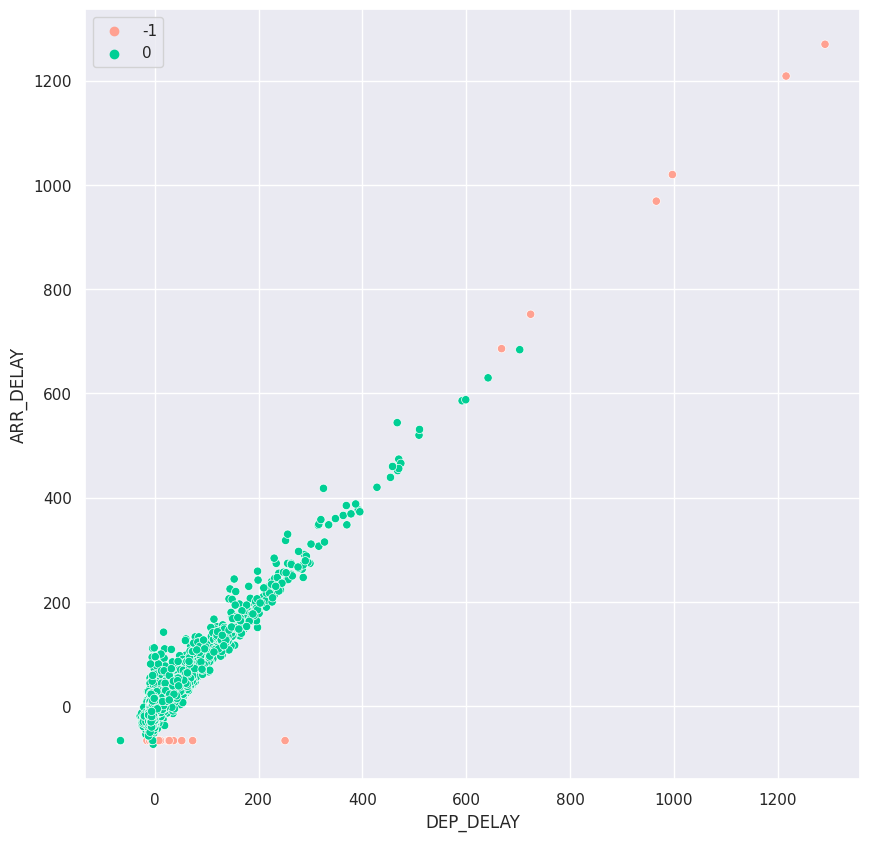

In [ ]:
colors = [ "#00CF95","#FFA191","#B3E2FF","#7FFFDD","#FFD6AC","#FFC1F2","#00D0D0","#A2A9FF","#FFF170", "#4472C4"]

sns.set(rc={'figure.figsize':(10,10)})
sns.set_palette(sns.color_palette(colors))

sns.scatterplot(data=df_sample, x="DEP_DELAY", y="ARR_DELAY", hue=dbscan.labels_, palette = sns.color_palette(["#FFA191", "#00CF95", "#4472C4"]))

In [ ]:
import plotly.graph_objects as go

In [ ]:
colors = [
    '#FFA191', '#FFBC9F', '#FFD6AC', '#80D3A1', '#00CF95', '#00D0D0', '#40E8D7', '#7FFFDD', '#FF99E9', '#D1B5F9', '#A2A9FF', '#4472C4', '#22A1AD',
    '#FF8670', '#FFA985', '#FFC285', '#67CB8F', '#00B884', '#00B8B8', '#24E5D2', '#5CFFD3', '#FF70E0', '#B98EF6', '#858FFF', '#3661AB', '#1E8F99'
]
special_keys = df_sample.loc[df_sample['dbscan.labels_'] == -1, 'DEST_STATE_ABR'].unique().tolist()
# Create the color_map dictionary
color_map = {k: colors[i] for i, k in enumerate(special_keys)}

# Set default color for all other possible keys
default_color = '#bdd48a'
all_possible_keys = [
    'OK', 'IL', 'WI', 'AZ', 'SD', 'CO', 'CA', 'MI', 'TX', 'NY', 'VA',
    'MN', 'KY', 'AL', 'AZ', 'AK', 'AR', 'CT', 'DE', 'FL', 'GA', 'HI',
    'ID', 'IN', 'IA', 'KS', 'LA', 'ME', 'MD', 'MA', 'MS', 'MO', 'MT',
    'NE', 'NV', 'NH', 'NJ', 'NM', 'NC', 'ND', 'OH', 'OR', 'PA', 'RI',
    'SC', 'TN', 'UT', 'VT', 'WA', 'WV', 'WY', 'PR', 'VI'
]

color_map.update({k: default_color for k in all_possible_keys if k not in special_keys})


jitter_strength = 0.3  # Adjust the strength of jitter as needed
np.random.seed(42)  # Set a seed for reproducibilit
jitter = np.random.uniform(low=0, high=jitter_strength, size=len(df_sample))
df_sample['jittered_labels'] = dbscan.labels_ - jitter
df_sample['dbscan.labels_'] = dbscan.labels_

df_sample.loc[~df_sample['DEST_STATE_ABR'].isin(['OK', 'IL', 'WI', 'AZ', 'SD', 'CO', 'CA', 'MI', 'TX', 'NY', 'VA', 'MN', 'KY']) & (df_sample['dbscan.labels_'] != -1), 'jittered_labels'] += jitter_strength


fig = px.scatter_3d(df_sample, x='DEP_DELAY', z='ARR_DELAY', y='jittered_labels',
                    color='DEST_STATE_ABR', color_discrete_map=color_map, #symbol = dbscan.labels_,
                    height=1000)


fig.update_layout(
    scene=dict(
        xaxis=dict(
            backgroundcolor='white',  # Set X-axis background color (black with opacity 0.7)
            gridcolor='#CCCCCC'
        ),
        yaxis=dict(
            backgroundcolor='white',  # Set X-axis background color (black with opacity 0.7)
            gridcolor='#CCCCCC'
        ),
        zaxis=dict(
            backgroundcolor='white',  # Set X-axis background color (black with opacity 0.7)
            gridcolor='#CCCCCC'
        ),
    )
)

camera = dict(
   eye=dict(x=-1.5, y=-1.5, z=0.5)
)
fig.update_traces(marker_size = 4, marker_opacity=.8,)
fig.update_layout(scene_camera=camera)
fig.update_yaxes(nticks = 56, range=[0, 56])
fig.update_layout(
    scene=dict(
        yaxis=dict(tickvals=[-1, 0, 1]),
        xaxis_title='Departure Delay',
        yaxis_title='DBSCAN Labels (with Jitter)',
        zaxis_title='Arrival Delay',
    ),
    margin=dict(l=0, r=0, b=0, t=0)
)

fig.update_layout(legend= {'itemsizing': 'constant', 'traceorder':'normal'})


legend_order = {
    'OK': 1, 'IL': 2, 'WI': 3, 'AZ': 4, 'SD': 5, 'CO': 6, 'CA': 7, 'MI': 8, 'TX': 9, 'NY': 10,
    'VA': 11, 'MN': 12, 'KY': 13,
}
custom_legend_order = {state: i for i, state in enumerate(legend_order.keys())}


fig.show()

#ax.view_init(elev=0, azim=60)


In [ ]:
colors = [
    '#FFA191', '#FFBC9F', '#FFD6AC', '#80D3A1', '#00CF95', '#00D0D0', '#40E8D7', '#7FFFDD', '#FF99E9', '#D1B5F9', '#A2A9FF', '#4472C4', '#22A1AD',
    '#FF8670', '#FFA985', '#FFC285', '#67CB8F', '#00B884', '#00B8B8', '#24E5D2', '#5CFFD3', '#FF70E0', '#B98EF6', '#858FFF', '#3661AB', '#1E8F99'
]
special_keys = df_sample.loc[df_sample['dbscan.labels_'] == -1, 'ORIGIN_STATE_ABR'].unique().tolist()

# Create the color_map dictionary
color_map = {k: colors[i] for i, k in enumerate(special_keys)}

# Set default color for all other possible keys
default_color = '#bdd48a'
all_possible_keys = [
    'OK', 'IL', 'WI', 'AZ', 'SD', 'CO', 'CA', 'MI', 'TX', 'NY', 'VA',
    'MN', 'KY', 'AL', 'AZ', 'AK', 'AR', 'CT', 'DE', 'FL', 'GA', 'HI',
    'ID', 'IN', 'IA', 'KS', 'LA', 'ME', 'MD', 'MA', 'MS', 'MO', 'MT',
    'NE', 'NV', 'NH', 'NJ', 'NM', 'NC', 'ND', 'OH', 'OR', 'PA', 'RI',
    'SC', 'TN', 'UT', 'VT', 'WA', 'WV', 'WY', 'PR', 'VI'
]

color_map.update({k: default_color for k in all_possible_keys if k not in special_keys})


jitter_strength = 0.3  # Adjust the strength of jitter as needed
np.random.seed(42)  # Set a seed for reproducibilit
jitter = np.random.uniform(low=0, high=jitter_strength, size=len(df_sample))
df_sample['jittered_labels'] = dbscan.labels_ - jitter
df_sample['dbscan.labels_'] = dbscan.labels_

df_sample.loc[~df_sample['DEST_STATE_ABR'].isin(special_keys) & (df_sample['dbscan.labels_'] != -1), 'jittered_labels'] += jitter_strength


fig = px.scatter_3d(df_sample, x='DEP_DELAY', z='ARR_DELAY', y='jittered_labels',
                    color='ORIGIN_STATE_ABR', color_discrete_map=color_map, symbol = dbscan.labels_,
                    height=1000)

fig.update_layout(
    scene=dict(
        xaxis=dict(
            backgroundcolor='white',  # Set X-axis background color (black with opacity 0.7)
            gridcolor='#CCCCCC'
        ),
        yaxis=dict(
            backgroundcolor='white',  # Set X-axis background color (black with opacity 0.7)
            gridcolor='#CCCCCC'
        ),
        zaxis=dict(
            backgroundcolor='white',  # Set X-axis background color (black with opacity 0.7)
            gridcolor='#CCCCCC'
        ),
    )
)

camera = dict(
   eye=dict(x=-1.5, y=-1.5, z=0.5)
)
fig.update_traces(marker_size = 4, marker_opacity=.8,)
fig.update_layout(scene_camera=camera)
fig.update_yaxes(nticks = 56, range=[0, 56])
fig.update_layout(
    scene=dict(
        yaxis=dict(tickvals=[-1, 0, 1]),
        xaxis_title='Departure Delay',
        yaxis_title='DBSCAN Labels (with Jitter)',
        zaxis_title='Arrival Delay',
    ),
    margin=dict(l=0, r=0, b=0, t=0)
)

fig.update_layout(legend= {'itemsizing': 'constant', 'traceorder':'normal'})


legend_order = {
    'OK': 1, 'IL': 2, 'WI': 3, 'AZ': 4, 'SD': 5, 'CO': 6, 'CA': 7, 'MI': 8, 'TX': 9, 'NY': 10,
    'VA': 11, 'MN': 12, 'KY': 13,
}
custom_legend_order = {state: i for i, state in enumerate(legend_order.keys())}


fig.show()

In [ ]:
dest_state_abr_list = df_sample.loc[df_sample['dbscan.labels_'] == -1, 'DEST_STATE_ABR'].unique().tolist()
dest_state_abr_list

['OK',
 'IL',
 'WI',
 'AZ',
 'SD',
 'CO',
 'CA',
 'MI',
 'TX',
 'NY',
 'VA',
 'MN',
 'KY',
 'IN',
 'OR',
 'ID',
 'MA',
 'TT',
 'AK']

In [ ]:
dest_state_abr_list = df_sample.loc[df_sample['dbscan.labels_'] == -1, 'ORIGIN_STATE_ABR'].unique().tolist()
dest_state_abr_list

['IL',
 'KY',
 'GA',
 'MN',
 'CO',
 'FL',
 'NY',
 'TX',
 'MI',
 'WA',
 'CA',
 'OH',
 'UT',
 'ND',
 'NC',
 'HI',
 'AK',
 'MA']

In [ ]:
#df_sample
db_outliers = df_sample[df_sample['dbscan.labels_'] == -1][['FL_DATE', 'ORIGIN_AIRPORT_ID', 'DEST_AIRPORT_ID', "DEP_DELAY", 'ARR_DELAY']]
db_outliers

,FL_DATE,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,DEP_DELAY,ARR_DELAY
339,2019-01-03 00:00:00+00:00,13930,13851,-2.0,-66.0
362,2019-01-10 00:00:00+00:00,14730,13930,966.0,969.0
1142,2019-01-28 00:00:00+00:00,10397,13342,-6.0,-66.0
1532,2019-01-11 00:00:00+00:00,13487,14107,-6.0,-66.0
1670,2019-01-27 00:00:00+00:00,13487,10141,-4.0,-66.0
1683,2019-01-16 00:00:00+00:00,11292,10372,10.0,-66.0
2278,2019-01-27 00:00:00+00:00,13303,11292,668.0,686.0
2296,2019-01-31 00:00:00+00:00,12478,12892,27.0,-66.0
2364,2019-01-14 00:00:00+00:00,11259,14771,-9.0,-66.0
2451,2019-01-29 00:00:00+00:00,12335,11433,1216.0,1209.0


In [ ]:
df= df.reset_index()
df = df.fillna(-66)
result = pd.merge( db_outliers, df,how="left", on=['FL_DATE', 'ORIGIN_AIRPORT_ID', 'DEST_AIRPORT_ID', "DEP_DELAY", 'ARR_DELAY'])
result['index'].tolist()

[490158,
 259286,
 282050,
 113891,
 473726,
 250208,
 42767,
 219580,
 239692,
 477922,
 93182,
 259372,
 417185,
 449318,
 210546,
 469875,
 54463,
 354955,
 529616,
 479941,
 467791,
 544652,
 240,
 469356,
 171352,
 256452,
 228490,
 526012,
 82692,
 490158,
 11902,
 501614,
 492652,
 121347,
 77196]

In [ ]:
set(result['index'].tolist()).intersection([93182, 477922, 259286, 467791, 42767, 479941, 312513, 381994, 451093, 259423, 270720, 352242, 382028, 46425, 93004, 46425, 259286, 467279, 42767, 477922, 93182, 527628, 381994, 467791, 312513, 467358])

{42767, 93182, 259286, 467791, 477922, 479941}

In [ ]:
set(result['index'].tolist()).intersection([93182, 477922, 259286, 467791, 42767, 479941, 312513, 381994, 451093, 259423, 270720, 352242, 382028, 46425, 93004, 46425, 259286, 467279, 42767, 477922, 93182, 527628, 381994, 467791, 312513, 467358,259286, 282050, 113891, 473726, 42767, 239692, 477922, 93182, 259372, 417185, 449318, 381994, 337032, 354955, 529616, 479941, 467791, 268199, 544652, 171352, 256452, 228490, 266925, 262613, 82692, 502920, 501614, 121347, 77196, 454429, 92801])

{42767,
 77196,
 82692,
 92801,
 93182,
 113891,
 121347,
 171352,
 228490,
 239692,
 256452,
 259286,
 259372,
 262613,
 266925,
 268199,
 282050,
 337032,
 354955,
 381994,
 417185,
 449318,
 454429,
 467791,
 473726,
 477922,
 479941,
 501614,
 502920,
 529616,
 544652}

# KNN

In [ ]:
df_sample = pd.read_csv('flight_2019_subset.csv')
df_sample = df_sample.drop(['Unnamed: 0'], axis=1)
df_sample['FL_DATE'] = pd.to_datetime(df_sample.FL_DATE, utc=True)

In [ ]:
from sklearn.neighbors import NearestNeighbors

In [ ]:
#df_sample = df.sample(n=20000)
df_sample[['ORIGIN_AWND', 'ORIGIN_PGTM', 'ORIGIN_PRCP', 'ORIGIN_SNOW',
       'ORIGIN_SNWD', 'ORIGIN_TAVG', 'ORIGIN_TMAX', 'ORIGIN_TMIN',
       'ORIGIN_WDF2', 'ORIGIN_WDF5', 'ORIGIN_WSF2', 'ORIGIN_WSF5',
       'ORIGIN_WT01', 'ORIGIN_WT02', 'ORIGIN_WT03', 'ORIGIN_WT04',
       'ORIGIN_WT05', 'ORIGIN_WT06', 'ORIGIN_WT07', 'ORIGIN_WT08',
       'ORIGIN_WT09', 'ORIGIN_WESD', 'ORIGIN_WT10', 'ORIGIN_PSUN',
       'ORIGIN_TSUN', 'ORIGIN_SN32', 'ORIGIN_SX32', 'ORIGIN_TOBS',
       'ORIGIN_WT11', 'DEST_STATION', 'DEST_DATE', 'DEST_AWND', 'DEST_PGTM',
       'DEST_PRCP', 'DEST_SNOW', 'DEST_SNWD', 'DEST_TAVG', 'DEST_TMAX',
       'DEST_TMIN', 'DEST_WDF2', 'DEST_WDF5', 'DEST_WSF2', 'DEST_WSF5',
       'DEST_WT01', 'DEST_WT02', 'DEST_WT03', 'DEST_WT04', 'DEST_WT05',
       'DEST_WT06', 'DEST_WT07', 'DEST_WT08', 'DEST_WT09', 'DEST_WESD',
       'DEST_WT10', 'DEST_PSUN', 'DEST_TSUN', 'DEST_SN32', 'DEST_SX32',
       'DEST_TOBS', 'DEST_WT11']] = df_sample[['ORIGIN_AWND', 'ORIGIN_PGTM', 'ORIGIN_PRCP', 'ORIGIN_SNOW',
       'ORIGIN_SNWD', 'ORIGIN_TAVG', 'ORIGIN_TMAX', 'ORIGIN_TMIN',
       'ORIGIN_WDF2', 'ORIGIN_WDF5', 'ORIGIN_WSF2', 'ORIGIN_WSF5',
       'ORIGIN_WT01', 'ORIGIN_WT02', 'ORIGIN_WT03', 'ORIGIN_WT04',
       'ORIGIN_WT05', 'ORIGIN_WT06', 'ORIGIN_WT07', 'ORIGIN_WT08',
       'ORIGIN_WT09', 'ORIGIN_WESD', 'ORIGIN_WT10', 'ORIGIN_PSUN',
       'ORIGIN_TSUN', 'ORIGIN_SN32', 'ORIGIN_SX32', 'ORIGIN_TOBS',
       'ORIGIN_WT11', 'DEST_STATION', 'DEST_DATE', 'DEST_AWND', 'DEST_PGTM',
       'DEST_PRCP', 'DEST_SNOW', 'DEST_SNWD', 'DEST_TAVG', 'DEST_TMAX',
       'DEST_TMIN', 'DEST_WDF2', 'DEST_WDF5', 'DEST_WSF2', 'DEST_WSF5',
       'DEST_WT01', 'DEST_WT02', 'DEST_WT03', 'DEST_WT04', 'DEST_WT05',
       'DEST_WT06', 'DEST_WT07', 'DEST_WT08', 'DEST_WT09', 'DEST_WESD',
       'DEST_WT10', 'DEST_PSUN', 'DEST_TSUN', 'DEST_SN32', 'DEST_SX32',
       'DEST_TOBS', 'DEST_WT11']].fillna(0)

df_sample = df_sample.fillna(-20)


In [ ]:
df_sample_knn = MinMaxScaler().fit_transform(df_sample.drop(['symbol', 'dbscan.labels_','jittered_labels','ORIGIN_DATE','DEST_DATE','DEST_STATION','ORIGIN_STATION','FL_DATE', 'DAY_OF_WEEK_STR', 'DEST_Name', 'DEST_IATA', 'DEST_ICAO',
                           'ORIGIN_Name', 'ORIGIN_CITY_NAME', 'ORIGIN_STATE_ABR', 'DEST_CITY_NAME', 'DEST_STATE_ABR', 'ORIGIN_IATA', 'ORIGIN_ICAO',
                                                                'ORIGIN_AWND', 'ORIGIN_PGTM', 'ORIGIN_PRCP', 'ORIGIN_SNOW',
       'ORIGIN_SNWD', 'ORIGIN_TAVG', 'ORIGIN_TMAX', 'ORIGIN_TMIN',
       'ORIGIN_WDF2', 'ORIGIN_WDF5', 'ORIGIN_WSF2', 'ORIGIN_WSF5',
       'ORIGIN_WT01', 'ORIGIN_WT02', 'ORIGIN_WT03', 'ORIGIN_WT04',
       'ORIGIN_WT05', 'ORIGIN_WT06', 'ORIGIN_WT07', 'ORIGIN_WT08',
       'ORIGIN_WT09', 'ORIGIN_WESD', 'ORIGIN_WT10', 'ORIGIN_PSUN',
       'ORIGIN_TSUN', 'ORIGIN_SN32', 'ORIGIN_SX32', 'ORIGIN_TOBS',
       'ORIGIN_WT11', 'DEST_STATION', 'DEST_DATE', 'DEST_AWND', 'DEST_PGTM',
       'DEST_PRCP', 'DEST_SNOW', 'DEST_SNWD', 'DEST_TAVG', 'DEST_TMAX',
       'DEST_TMIN', 'DEST_WDF2', 'DEST_WDF5', 'DEST_WSF2', 'DEST_WSF5',
       'DEST_WT01', 'DEST_WT02', 'DEST_WT03', 'DEST_WT04', 'DEST_WT05',
       'DEST_WT06', 'DEST_WT07', 'DEST_WT08', 'DEST_WT09', 'DEST_WESD',
       'DEST_WT10', 'DEST_PSUN', 'DEST_TSUN', 'DEST_SN32', 'DEST_SX32',
       'DEST_TOBS', 'DEST_WT11'], axis=1))

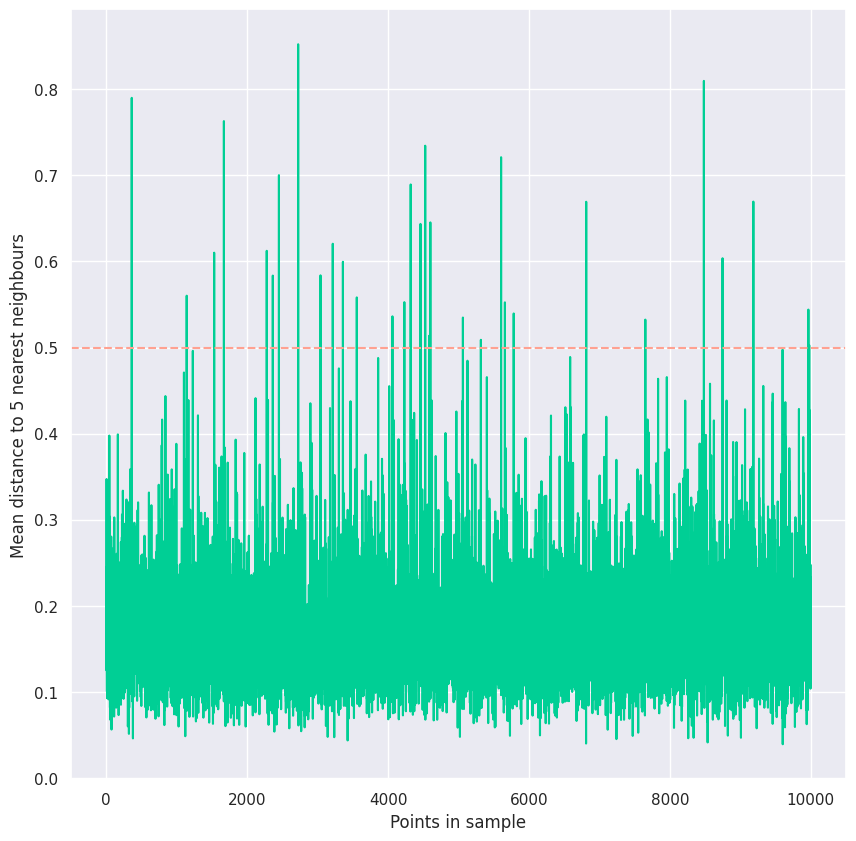

In [ ]:
nbrs = NearestNeighbors(n_neighbors = 5)
nbrs.fit(df_sample_knn)

distances, indexes = nbrs.kneighbors(df_sample_knn)
#distances = np.log(distances)
plt.plot(distances.mean(axis =1),  color="#00CF95")
plt.axhline(y=0.5,  linestyle='--', color="#FFA191")
plt.ylabel('Mean distance to 5 nearest neighbours')
plt.xlabel('Points in sample')
plt.show()

In [ ]:
outlier_index = np.where(distances.mean(axis = 1) > 0.5)
outlier_index[0]

array([ 362, 1142, 1532, 1670, 2278, 2364, 2451, 2724, 3041, 3215, 3359,
       3556, 4062, 4231, 4321, 4460, 4527, 4583, 4600, 5062, 5317, 5604,
       5658, 5783, 6812, 7651, 8482, 8747, 9184, 9965, 9977])

In [ ]:
db_outliers = df_sample.iloc[outlier_index[0]][['FL_DATE', 'ORIGIN_AIRPORT_ID', 'DEST_AIRPORT_ID', "DEP_DELAY", 'ARR_DELAY']]
db_outliers

,FL_DATE,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,DEP_DELAY,ARR_DELAY
362,2019-01-10 00:00:00+00:00,14730,13930,966.0,969.0
1142,2019-01-28 00:00:00+00:00,10397,13342,-6.0,-66.0
1532,2019-01-11 00:00:00+00:00,13487,14107,-6.0,-66.0
1670,2019-01-27 00:00:00+00:00,13487,10141,-4.0,-66.0
2278,2019-01-27 00:00:00+00:00,13303,11292,668.0,686.0
2364,2019-01-14 00:00:00+00:00,11259,14771,-9.0,-66.0
2451,2019-01-29 00:00:00+00:00,12335,11433,1216.0,1209.0
2724,2019-01-23 00:00:00+00:00,14747,11298,1291.0,1270.0
3041,2019-01-10 00:00:00+00:00,12892,15023,25.0,-66.0
3215,2019-01-07 00:00:00+00:00,14831,14908,11.0,-66.0


In [ ]:
#df = df.fillna(-20)
result = pd.merge( db_outliers, df,how="left", on=['FL_DATE', 'ORIGIN_AIRPORT_ID', 'DEST_AIRPORT_ID', "DEP_DELAY", 'ARR_DELAY'])
result['index'].tolist()

[259286,
 282050,
 113891,
 473726,
 42767,
 239692,
 477922,
 93182,
 259372,
 417185,
 449318,
 381994,
 337032,
 354955,
 529616,
 479941,
 467791,
 268199,
 544652,
 171352,
 256452,
 228490,
 266925,
 262613,
 82692,
 502920,
 501614,
 121347,
 77196,
 454429,
 92801]

In [ ]:
set(result['index'].tolist()).intersection([93182, 477922, 259286, 467791, 42767, 479941, 312513, 381994, 451093, 259423, 270720, 352242, 382028, 46425, 93004, 46425, 259286, 467279, 42767, 477922, 93182, 527628, 381994, 467791, 312513, 467358])

{42767, 93182, 259286, 381994, 467791, 477922, 479941}

In [ ]:


df_sample['outlier_flag'] = ~df_sample.index.isin(outlier_index[0])
df_sample['outlier_flag'] = df_sample['outlier_flag'] - 1

colors = [
    '#FFA191', '#FFBC9F', '#FFD6AC', '#80D3A1', '#00CF95', '#00D0D0', '#40E8D7', '#7FFFDD', '#FF99E9', '#D1B5F9', '#A2A9FF', '#4472C4', '#22A1AD',
    '#FF8670', '#FFA985', '#FFC285', '#67CB8F', '#00B884', '#00B8B8', '#24E5D2', '#5CFFD3', '#FF70E0', '#B98EF6', '#858FFF', '#3661AB', '#1E8F99'
]
special_keys = df_sample.loc[df_sample['outlier_flag'] == -1, 'DEST_STATE_ABR'].unique().tolist()
# Create the color_map dictionary
color_map = {k: colors[i] for i, k in enumerate(special_keys)}

# Set default color for all other possible keys
default_color = '#bdd48a'
all_possible_keys = [
    'OK', 'IL', 'WI', 'AZ', 'SD', 'CO', 'CA', 'MI', 'TX', 'NY', 'VA',
    'MN', 'KY', 'AL', 'AZ', 'AK', 'AR', 'CT', 'DE', 'FL', 'GA', 'HI',
    'ID', 'IN', 'IA', 'KS', 'LA', 'ME', 'MD', 'MA', 'MS', 'MO', 'MT',
    'NE', 'NV', 'NH', 'NJ', 'NM', 'NC', 'ND', 'OH', 'OR', 'PA', 'RI',
    'SC', 'TN', 'UT', 'VT', 'WA', 'WV', 'WY', 'PR', 'VI'
]

color_map.update({k: default_color for k in all_possible_keys if k not in special_keys})

jitter_strength = 0.3  # Adjust the strength of jitter as needed
np.random.seed(42)  # Set a seed for reproducibilit
jitter = np.random.uniform(low=0, high=jitter_strength, size=len(df_sample))
df_sample['jittered_labels'] = df_sample['outlier_flag'] - jitter


df_sample.loc[~df_sample['DEST_STATE_ABR'].isin(['OK', 'IL', 'WI', 'AZ', 'SD', 'CO', 'CA', 'MI', 'TX', 'NY', 'VA', 'MN', 'KY']) & (df_sample['outlier_flag'] != -1), 'jittered_labels'] += jitter_strength


fig = px.scatter_3d(df_sample, x='DEP_DELAY', z='ARR_DELAY', y='jittered_labels',
                    color='DEST_STATE_ABR', color_discrete_map=color_map, #symbol = 'outlier_flag',
                    height=1000)



fig.update_layout(
    scene=dict(
        xaxis=dict(
            backgroundcolor='white',
            gridcolor='#CCCCCC'
        ),
        yaxis=dict(
            backgroundcolor='white',
            gridcolor='#CCCCCC'
        ),
        zaxis=dict(
            backgroundcolor='white',
            gridcolor='#CCCCCC'
        ),
    )
)

camera = dict(
   eye=dict(x=-1.5, y=-1.5, z=0.5)
)
fig.update_traces(marker_size = 4, marker_opacity=.8,)
fig.update_layout(scene_camera=camera)
fig.update_yaxes(nticks = 56, range=[0, 56])
fig.update_layout(
    scene=dict(
        yaxis=dict(tickvals=[-1, 0, 1]),
        xaxis_title='Departure Delay',
        yaxis_title='KNN Labels (with Jitter)',
        zaxis_title='Arrival Delay',
    ),
    margin=dict(l=0, r=0, b=0, t=0)
)

fig.update_layout(legend= {'itemsizing': 'constant', 'traceorder':'normal'})


legend_order = {
    'OK': 1, 'IL': 2, 'WI': 3, 'AZ': 4, 'SD': 5, 'CO': 6, 'CA': 7, 'MI': 8, 'TX': 9, 'NY': 10,
    'VA': 11, 'MN': 12, 'KY': 13,
}
custom_legend_order = {state: i for i, state in enumerate(legend_order.keys())}


fig.show()

In [ ]:
colors = [
    '#FFA191', '#FFBC9F', '#FFD6AC', '#80D3A1', '#00CF95', '#00D0D0', '#40E8D7', '#7FFFDD', '#FF99E9', '#D1B5F9', '#A2A9FF', '#4472C4', '#22A1AD',
    '#FF8670', '#FFA985', '#FFC285', '#67CB8F', '#00B884', '#00B8B8', '#24E5D2', '#5CFFD3', '#FF70E0', '#B98EF6', '#858FFF', '#3661AB', '#1E8F99'
]
special_keys = df_sample.loc[df_sample['outlier_flag'] == -1, 'ORIGIN_STATE_ABR'].unique().tolist()
# Create the color_map dictionary
color_map = {k: colors[i] for i, k in enumerate(special_keys)}

# Set default color for all other possible keys
default_color = '#bdd48a'
all_possible_keys = [
    'OK', 'IL', 'WI', 'AZ', 'SD', 'CO', 'CA', 'MI', 'TX', 'NY', 'VA',
    'MN', 'KY', 'AL', 'AZ', 'AK', 'AR', 'CT', 'DE', 'FL', 'GA', 'HI',
    'ID', 'IN', 'IA', 'KS', 'LA', 'ME', 'MD', 'MA', 'MS', 'MO', 'MT',
    'NE', 'NV', 'NH', 'NJ', 'NM', 'NC', 'ND', 'OH', 'OR', 'PA', 'RI',
    'SC', 'TN', 'UT', 'VT', 'WA', 'WV', 'WY', 'PR', 'VI'
]

color_map.update({k: default_color for k in all_possible_keys if k not in special_keys})

jitter_strength = 0.3  # Adjust the strength of jitter as needed
np.random.seed(42)  # Set a seed for reproducibilit
jitter = np.random.uniform(low=0, high=jitter_strength, size=len(df_sample))
df_sample['jittered_labels'] = df_sample['outlier_flag'] - jitter


df_sample.loc[~df_sample['DEST_STATE_ABR'].isin(['OK', 'IL', 'WI', 'AZ', 'SD', 'CO', 'CA', 'MI', 'TX', 'NY', 'VA', 'MN', 'KY']) & (df_sample['outlier_flag'] != -1), 'jittered_labels'] += jitter_strength

fig = px.scatter_3d(df_sample, x='DEP_DELAY', z='ARR_DELAY', y='jittered_labels',
                    color='DEST_STATE_ABR', color_discrete_map=color_map, #symbol = 'outlier_flag',
                    height=1100)



fig.update_layout(
    scene=dict(
        xaxis=dict(
            backgroundcolor='white',
            gridcolor='#CCCCCC'
        ),
        yaxis=dict(
            backgroundcolor='white',
            gridcolor='#CCCCCC'
        ),
        zaxis=dict(
            backgroundcolor='white',
            gridcolor='#CCCCCC'
        ),
    )
)

camera = dict(
   eye=dict(x=-1.5, y=-1.5, z=0.5)
)
fig.update_traces(marker_size = 4, marker_opacity=.8,)
fig.update_layout(scene_camera=camera)
fig.update_yaxes(nticks = 56, range=[0, 56])
fig.update_layout(
    scene=dict(
        yaxis=dict(tickvals=[-1, 0, 1]),
        xaxis_title='Departure Delay',
        yaxis_title='KNN Labels (with Jitter)',
        zaxis_title='Arrival Delay',
    ),
    margin=dict(l=0, r=0, b=0, t=0)
)

fig.update_layout(legend= {'itemsizing': 'constant', 'traceorder':'normal'})


legend_order = {
    'OK': 1, 'IL': 2, 'WI': 3, 'AZ': 4, 'SD': 5, 'CO': 6, 'CA': 7, 'MI': 8, 'TX': 9, 'NY': 10,
    'VA': 11, 'MN': 12, 'KY': 13,
}
custom_legend_order = {state: i for i, state in enumerate(legend_order.keys())}


fig.show()

In [ ]:
sns.set(rc={'figure.figsize':(10,10)})
sns.set_palette(sns.color_palette(colors))

sns.scatterplot(data=df_sample, x="DEP_DELAY", y="ARR_DELAY", hue="outlier_flag", palette = sns.color_palette(["#FFA191", "#00CF95", "#4472C4"]))

In [ ]:
import matplotlib.patches as patches

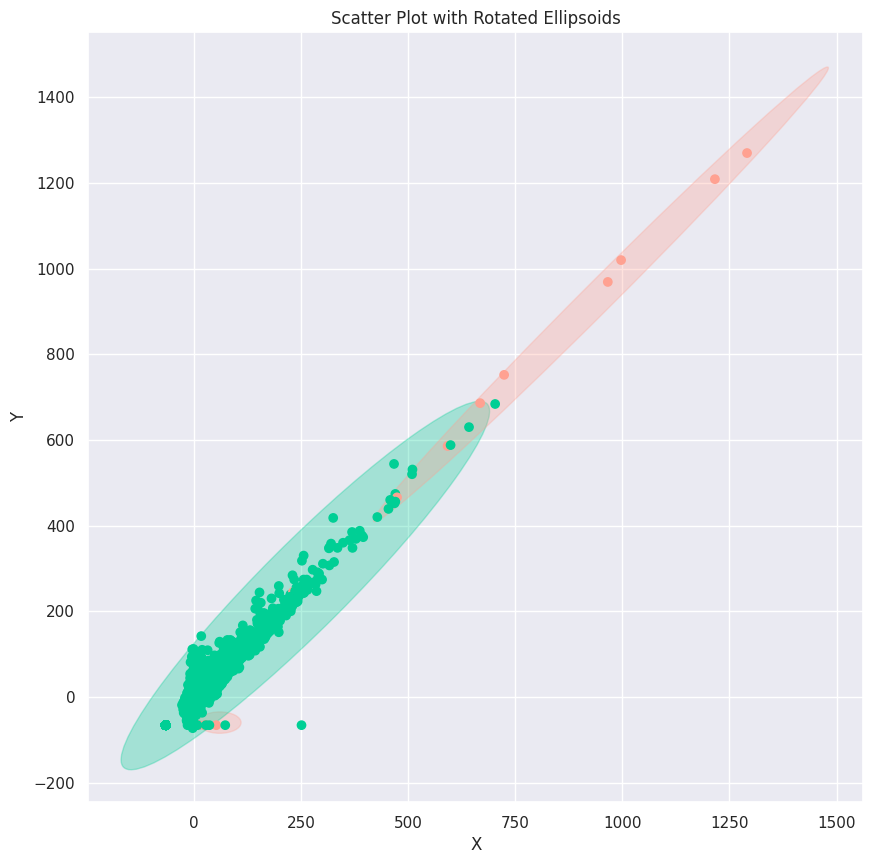

In [ ]:
colors = ['#FFA191' if flag == -1 else '#00CF95' for flag in df_sample['outlier_flag'].values]

# Define the centers, widths, heights, and rotation angles of the ellipsoids
ellipsoid_centers = [(60, -60), (260, 260), (950, 940)]
ellipsoid_widths = [100, 200, 70]
ellipsoid_heights = [50, 1200, 1500]
ellipsoid_angles = [0, -45, -45]  # Rotation angles in degrees
ellipsoid_colours = ["#FFA191", "#00CF95", "#FFA191"]


# Draw ellipsoids on the scatter plot
for center, width, height, angle, color in zip(ellipsoid_centers, ellipsoid_widths, ellipsoid_heights, ellipsoid_angles, ellipsoid_colours):
    ellipse = patches.Ellipse(center, width, height, angle=angle, color=color, alpha=0.3, fill=True)
    plt.gca().add_patch(ellipse)
plt.scatter(data=df_sample, x="DEP_DELAY", y="ARR_DELAY", c=colors, label='Data Points')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot with Rotated Ellipsoids')
plt.axis('equal')
plt.show()

In [ ]:
from google.colab import files
df_sample.to_csv('df_sample.csv', encoding = 'utf-8-sig')
files.download('df_sample.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>